# AtliQ Hotels Data Analysis Project

In [36]:
import pandas as pd
import numpy as np

# Data Import and Data Exploration

In [37]:
df_bookings= pd.read_csv("C:/Users/Hairav/Downloads/64101194a2364/source-code/3_project_hospitality_analysis/datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [38]:
df_bookings.shape

(134590, 12)

In [39]:
df_bookings["room_category"].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [40]:
df_bookings["booking_platform"].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<Axes: ylabel='booking_platform'>

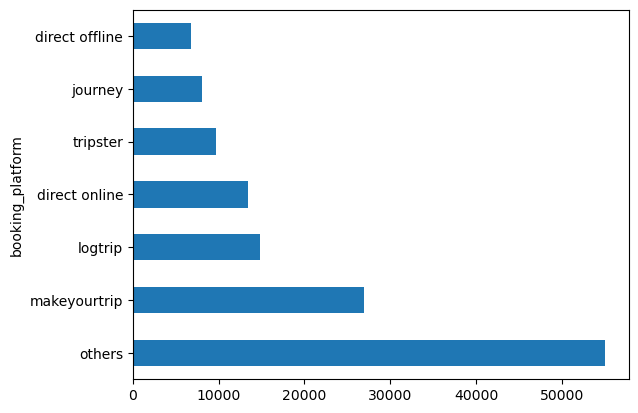

In [41]:
df_bookings["booking_platform"].value_counts().plot(kind="barh")

In [42]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [43]:
df_date=pd.read_csv("C:/Users/Hairav/Downloads/64101194a2364/source-code/3_project_hospitality_analysis/datasets/dim_date.csv")
df_hotels=pd.read_csv("C:/Users/Hairav/Downloads/64101194a2364/source-code/3_project_hospitality_analysis/datasets/dim_hotels.csv")
df_rooms=pd.read_csv("C:/Users/Hairav/Downloads/64101194a2364/source-code/3_project_hospitality_analysis/datasets/dim_rooms.csv")
df_agg_bookings=pd.read_csv("C:/Users/Hairav/Downloads/64101194a2364/source-code/3_project_hospitality_analysis/datasets/fact_aggregated_bookings.csv")


<Axes: xlabel='city'>

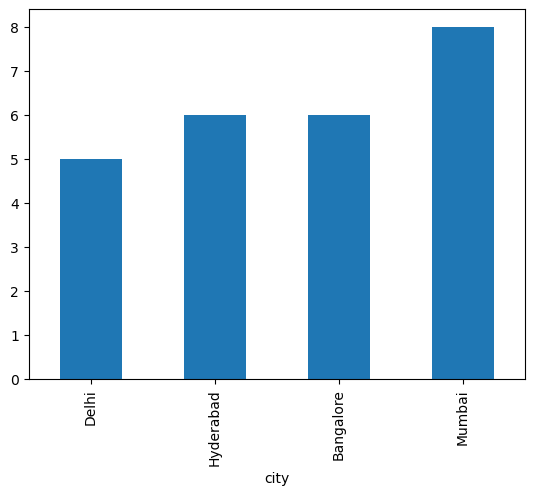

In [44]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

# Exercise: Explore aggregate bookings

In [45]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


Exercise-1. Find out unique property ids in aggregate bookings dataset

In [46]:
df_agg_bookings["property_id"].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

Exercise-2. Find out total bookings per property_id

In [48]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum().sort_values()

property_id
16558    3153
17562    3424
17564    3982
19558    4400
16561    4418
18558    4475
16560    4693
19559    4729
18563    4737
16562    4820
17558    5053
17561    5183
18559    5256
19563    5413
19561    5736
19562    5812
17560    6013
19560    6079
17559    6142
17563    6337
18561    6458
18560    6638
16563    7211
18562    7333
16559    7338
Name: successful_bookings, dtype: int64

Exercise-3. Find out days on which bookings are greater than capacity

In [51]:
df_agg_bookings[df_agg_bookings["successful_bookings"]>df_agg_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


Exercise-4. Find out properties that have highest capacity

In [59]:
df_agg_bookings[df_agg_bookings["capacity"]==df_agg_bookings["capacity"].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# Data Cleaning

In [33]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [60]:
# Checking negative values
df_bookings[df_bookings["no_guests"]<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

# (1) Clean invalid guests

In [63]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [66]:
df_bookings.shape

(134578, 12)

In [16]:
df_bookings.revenue_generated.max(),df_bookings.revenue_generated.min()

(28560000, 6500)

In [17]:
df_bookings[df_bookings["revenue_generated"]==df_bookings["revenue_generated"].max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560


(2) Outlier removal in revenue generated

In [67]:
avg,std=df_bookings["revenue_generated"].mean(),df_bookings["revenue_generated"].std()
avg,std

(15378.036937686695, 93040.15493143328)

In [68]:
higher_limit = avg+3*std
higher_limit 

294498.50173198653

In [69]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [70]:
# Checking negative value for revenue_generated
df_bookings[df_bookings["revenue_generated"]<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [71]:
# Ckecking outliers
df_bookings[df_bookings["revenue_generated"]>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [72]:
df_bookings = df_bookings[df_bookings["revenue_generated"]<=higher_limit]

In [73]:
# Outliers Removed
df_bookings.shape

(134573, 12)

In [74]:
# Checking Outliers for revenue_realized
df_bookings["revenue_realized"].max()

45220

In [75]:
high_limit = df_bookings["revenue_realized"].mean() + 3*df_bookings["revenue_realized"].std()
high_limit 

33479.3586618449

In [76]:
df_bookings[df_bookings["revenue_realized"]>high_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [77]:
df_bookings[df_bookings["room_category"]=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [80]:
23439+3* 9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. 
Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column.

In [90]:
# Checking Null Value
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, 
we should not filter these values. Also we should not replace this rating with a median or mean rating etc

# Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [91]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [94]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [96]:
df_agg_bookings.capacity.median()

25.0

In [98]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace=True)

In [99]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [100]:
# Null value replaced

Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [103]:
df_agg_bookings[df_agg_bookings["successful_bookings"]>df_agg_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [105]:
df_agg_bookings=df_agg_bookings[df_agg_bookings["successful_bookings"]<=df_agg_bookings["capacity"]]

In [106]:
df_agg_bookings.shape

(9194, 5)

# Data Transformation

In [109]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [116]:
df_agg_bookings.successful_bookings*100/df_agg_bookings.capacity

0       83.333333
1       93.333333
2       76.666667
4       94.736842
5       70.000000
          ...    
9195    72.222222
9196    72.222222
9197    50.000000
9198    50.000000
9199    75.000000
Length: 9194, dtype: float64

In [122]:
df_agg_bookings["occ_pct"] = df_agg_bookings.successful_bookings/df_agg_bookings.capacity

C:\Users\Hairav\AppData\Local\Temp\ipykernel_3512\2802354328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings["occ_pct"] = df_agg_bookings.successful_bookings/df_agg_bookings.capacity


In [123]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


Convert it to a percentage value

In [124]:
df_agg_bookings["occ_pct"]=df_agg_bookings["occ_pct"].apply(lambda x: round(x*100,2))

C:\Users\Hairav\AppData\Local\Temp\ipykernel_3512\1244425390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings["occ_pct"]=df_agg_bookings["occ_pct"].apply(lambda x: round(x*100,2))


In [129]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 760.8+ KB


# Insights Generation

# 1. What is an average occupancy rate in each of the room categories?

In [131]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [139]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [141]:
df_agg_bookings
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [145]:
df=pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [146]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

In [149]:
# Drop extra room_id
df.drop("room_id",axis=1,inplace=True)

In [150]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard


2. Print average occupancy rate per city

In [154]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [161]:
df=pd.merge(df,df_hotels,on="property_id")


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,16563,27-Jul-22,RT4,10,18.0,55.56,Presidential,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi
9190,16563,28-Jul-22,RT4,9,18.0,50.00,Presidential,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi
9191,16563,29-Jul-22,RT4,9,18.0,50.00,Presidential,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi
9192,16563,30-Jul-22,RT4,11,18.0,61.11,Presidential,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi,Atliq Palace,Business,Delhi


<Axes: xlabel='city'>

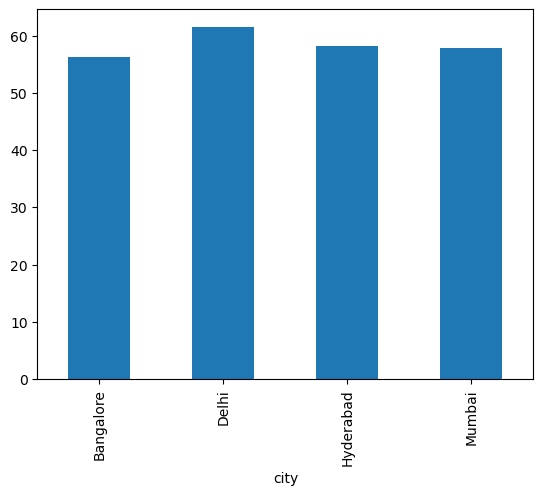

In [166]:
df.groupby("city")["occ_pct"].mean().round(2).plot(kind="bar")

3. When was the occupancy better? Weekday or Weekend?

In [169]:
df_date.head(1)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend


In [172]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")

In [180]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

4: In the month of June, what is the occupancy for different cities

In [187]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [199]:
df_jun_22 = df[df["mmm yy"]=="Jun 22"]
df_jun_22.groupby("city")["occ_pct"].mean().sort_values(ascending=False)

city
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Bangalore    56.436143
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

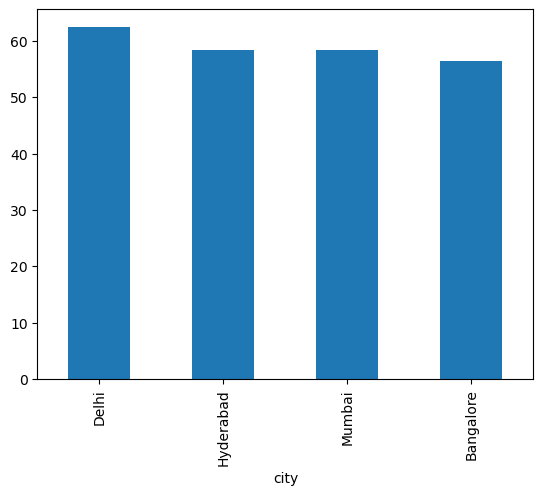

In [200]:
df_jun_22.groupby("city")["occ_pct"].mean().sort_values(ascending=False).plot(kind="bar")

5: We got new data for the month of august. Append that to existing data

In [215]:
df_august = pd.read_csv("C:/Users/Hairav/Downloads/64101194a2364/source-code/3_project_hospitality_analysis/datasets/new_data_august.csv")

In [217]:
df_august.head(2)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.0
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.0


In [222]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=0)
latest_df.tail(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,...,category_y,city_y,property_name,category,city,date,mmm yy,week no,day_type,occ%
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [223]:
latest_df.shape

(6504, 21)

6. Print revenue realized per city

In [234]:
df_bookings_all = pd.merge(df_bookings,df_hotels,on="property_id")
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

7. Print month by month revenue

In [235]:
df_bookings_all.head(1)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [243]:
df_date["date"]=pd.to_datetime(df_date["date"])

C:\Users\Hairav\AppData\Local\Temp\ipykernel_3512\1124805798.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])


In [261]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"],errors='coerce')

In [266]:
df_all = pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")

In [269]:
df_all.groupby("mmm yy")["revenue_realized"].sum().sort_values(ascending=False)

mmm yy
May 22    60961428
Jul 22    60278496
Jun 22    52903014
Name: revenue_realized, dtype: int64

# Print revenue realized per hotel type

In [308]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [309]:
import matplotlib.pyplot as plt

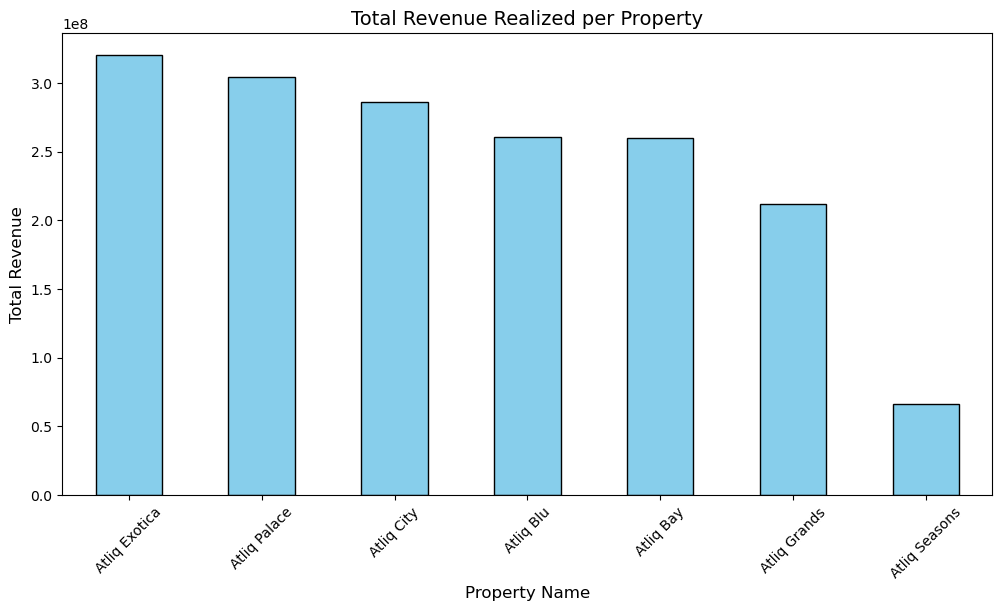

In [310]:
revenue_per_hotel = df_bookings_all.groupby("property_name")["revenue_realized"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
revenue_per_hotel.plot(kind="bar",color="skyblue",edgecolor="black")
plt.title("Total Revenue Realized per Property", fontsize=14)
plt.xlabel("Property Name", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Print average rating per city

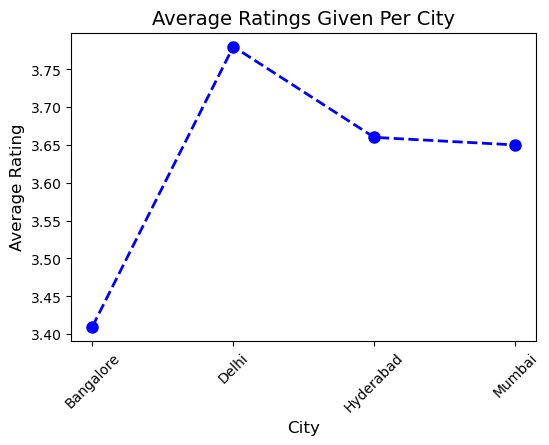

In [311]:
rating_city = df_bookings_all.groupby("city")["ratings_given"].mean().round(2)
plt.figure(figsize=(6,4))
plt.plot(rating_city.index,rating_city.values,marker="o", linestyle="dashed", color="blue", markersize=8, linewidth=2)
plt.title("Average Ratings Given Per City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Print a pie chart of revenue realized per booking platform

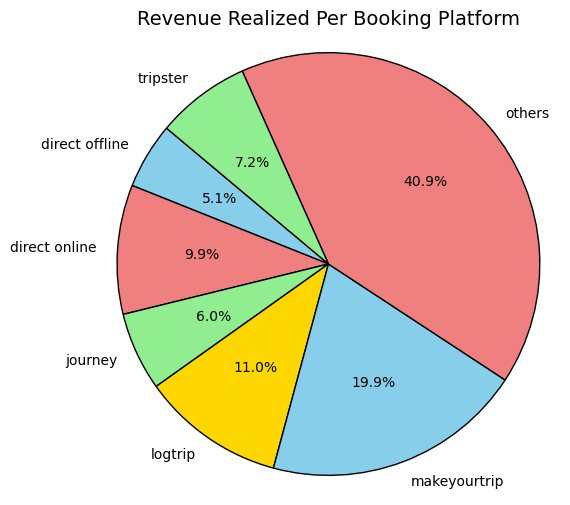

In [312]:
revenue_platform = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()
plt.figure(figsize=(6,6))
plt.pie(revenue_platform, labels=revenue_platform.index, autopct='%1.1f%%', 
        colors=["skyblue", "lightcoral", "lightgreen", "gold"], startangle=140, 
        wedgeprops={'edgecolor': 'black'})
plt.title("Revenue Realized Per Booking Platform", fontsize=14)
plt.axis("equal") 
plt.show()